# TensorFlow Basics

In [1]:
import tensorflow as tf

In [47]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [2]:
h = tf.constant('Hello World')

In [5]:
h

<tf.Tensor 'Const:0' shape=() dtype=string>

In [6]:
x = tf.constant(100)

In [7]:
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [9]:
# Create Session object in which we can run operations.
# A session object encapsulates the environment in which
# operations are executed. Tensor objects are evaluated
# by operations.
session = tf.Session()

In [10]:
session.run(h)

b'Hello World'

In [11]:
session.run(x)

100

In [12]:
type(session.run(x))

numpy.int32

In [13]:
type(session.run(h))

bytes

## Operations

In [19]:
a = tf.constant(2)
b = tf.constant(3)

In [20]:
with tf.Session() as session:
    print('Addition: {}'.format(session.run(a + b)))
    print('Subtraction: {}'.format(session.run(a - b)))
    print('Multiplication: {}'.format(session.run(a * b)))
    print('Division: {}'.format(session.run(a / b)))

Addition: 5
Subtraction: -1
Multiplication: 6
Division: 0.6666666666666666


In [34]:
e = np.array([[5., 5.]])
f = np.array([[2.], [2.]])

In [35]:
e

array([[ 5.,  5.]])

In [36]:
f

array([[ 2.],
       [ 2.]])

In [38]:
# Convert numpy arrays to TensorFlow objects
ec = tf.constant(e)
fc = tf.constant(f)

In [39]:
matrix_mult_op = tf.matmul(ec, fc)

In [40]:
with tf.Session() as session:
    print('Matrix Multiplication: {}'.format(session.run(matrix_mult_op)))


Matrix Multiplication: [[ 20.]]


### Placeholders

Instead of using a constant, we can define a placeholder that allows us to provide the value at the time of execution just like function parameters.

In [21]:
c = tf.placeholder(tf.int32)
d = tf.placeholder(tf.int32)

In [67]:
add_op = tf.add(c, d)
sub_op = tf.subtract(c, d)
mult_op = tf.multiply(c, d)
div_op = tf.divide(c, d)

In [68]:
with tf.Session() as session:
    input_dict = {c: 11, d: 10}
    print('Addition: {}'.format(session.run(add_op, feed_dict=input_dict)))
    print('Subtraction: {}'.format(session.run(sub_op, feed_dict=input_dict)))
    print('Multiplication: {}'.format(session.run(mult_op, feed_dict=input_dict)))
    print('Division: {}'.format(session.run(div_op, feed_dict={c:11, d:11})))


Addition: 21
Subtraction: 1
Multiplication: 110
Division: 1.0


### Variables

A variable is a tensor that can change during program execution.

In [74]:
var2 = tf.get_variable('var2', [2])

In [75]:
var2

<tf.Variable 'var2:0' shape=(2,) dtype=float32_ref>

## Classification using the MNIST dataset

In [41]:
from tensorflow.examples.tutorials.mnist import input_data

In [42]:
mnist = input_data.read_data_sets('data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data\t10k-labels-idx1-ubyte.gz


In [43]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [44]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [45]:
mnist.train.images.shape

(55000, 784)

The MNIST dataset contain 55,000 images. The dimensions of each image is 28-by-28. Each vector has 784 elements because 28*28=784. 

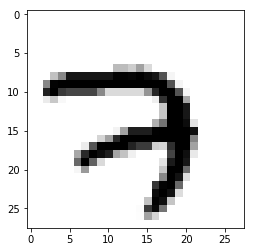

In [57]:
# Convert the vector to a 28x28 matrix
sample_img = mnist.train.images[0].reshape(28, 28)

# Show the picture
plt.imshow(sample_img, cmap='Greys')

Before we begin, we specify three parameters:
- the learning rate $\alpha$: how quickly should the cost function be adjusted.
- training epoch: number of training cycles
- batch size: batches of training data

In [59]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

Network parameters

In [64]:
# Number of classes is 10 because we have 10 digits
n_classes = 10

# Number of training examples
n_samples = mnist.train.num_examples

# The flatten array of the 28x28 image matrix contains 784 elements
n_input = 784

# Number of neurons in the hidden layers. For image data, 256 neurons
# is common because we have 256 intensity values (8-bit).
# In this example, we only use 2 hidden layers. The more hidden
# layers, we use the longer it takes for the model to run but
# more layers has the possibility of being more accurate.
n_hidden_1 = 256
n_hidden_2 = 256

def multi

In [65]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for the data input
    weights: Dictionary of weights
    biases: Dictionary of bias values
    '''
    
    # First hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer
    layer_out = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return layer_out

In [82]:
weights = {
    'h1': tf.Variable(tf.random_normal(shape=[n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal(shape=[n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal(shape=[n_hidden_2, n_classes]))
}

In [81]:
tf.random_normal(shape=(n_input, n_hidden_1))

<tf.Tensor 'random_normal_1:0' shape=(784, 256) dtype=float32>

In [80]:
#tf.Session().run(weights['h1'])